In [1]:
from poisson_solver import*
import matplotlib.pyplot as plt

Libraries fetched!...



Problem

$$
\nabla^2 u = f \quad (x,y)\in [0,1]\times[0,1]\\
u(0,y) = q_1 \quad 0 \leq y\leq 1\\
u(1, y) = q_2 \quad 0\leq y\leq 1\\
\partial_x u(x,0)n_1 + \partial_y u(x,0)n_2 = q_3 \quad 0\leq x \leq 1\\
\partial_y u(x,1)n_1 + \partial_y u(x,1)n_2= q_4 \quad 0\leq x \leq 1
$$

$$
f = -2\sin(x)\sin(y)\\
q_1 = q_2= \sin(x)\sin(y)\\
q3 = q_4 = \cos(x)\sin(y) + \sin(x)\cos(y)
$$

In [2]:
mesh = fd.UnitSquareMesh(100, 100)

In [3]:
model = PoissonSolver(mesh, P = 1)

PoissonSolver initialized!


In [4]:
true_sol = lambda x,y: fd.sin(x)*fd.sin(y)

model.MMS(true_sol, DBCs=[1, 2], NBCs=[3, 4], func_type="callable")

array([[[1, 2],
        [3, 4]]])

In [5]:
rhs = lambda x, y: -2*fd.sin(x)*fd.sin(y)
model.impose_rhs(rhs, func_type = 'callable')

In [41]:
DirBC = lambda x,y: fd.sin(x)*fd.sin(y)
model.impose_DBC(DirBC, [1, 2], func_type = "callable")

In [27]:
NeuBC = fd.grad(true_sol)
model.impose_NBC(NeuBC, [3, 4], func_type = "fd")

In [6]:
NeuBC3 = lambda x,y: -fd.sin(x)*fd.cos(y)
model.impose_NBC(NeuBC3, 3, func_type="callable")

In [7]:
NeuBC4 = lambda x,y: fd.sin(x)*fd.cos(y)
model.impose_NBC(NeuBC4, 4, func_type="callable")

In [8]:
model.solve()

In [9]:
diff = fd.Function(model.V)
diff.interpolate(model.true_sol - model.u_sol)
np.abs(np.max(diff.dat.data))

np.float64(3.1796442641063294e-06)

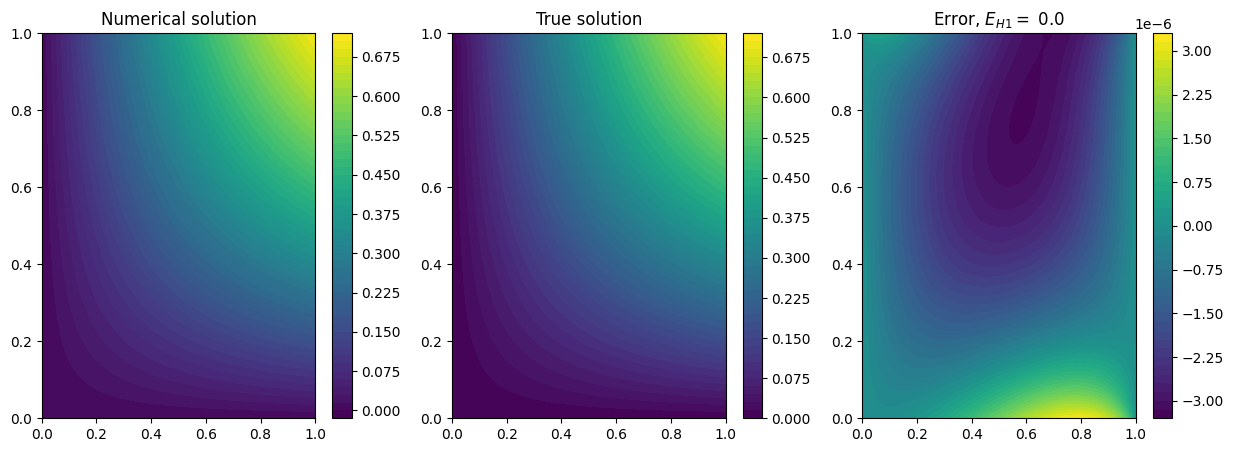

In [10]:
model.plot_results(norm = "H1", levels = 50)